In [5]:
# API - http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/jointEOF.html
from io import BytesIO
import requests
import xarray as xr
import hvplot.xarray
from skimage import io
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt

def download_data(url):
    r = requests.get(url)
    buf = BytesIO(r.content)
    return xr.open_dataset(buf,decode_times=False)

# Generate data remotely
cmda_url = 'http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/JointEOF'


query = dict(
    model1='GFDL_ESM2G',
    var1='clt',
    pres1=-999999,
    model2='GFDL_ESM2G',
    var2='hur',
    pres2=500,
    purpose='',
    lon1S=0,
    lon1E=360,
    lat1S=-90,
    lat1E=90,
    anomaly1=0,
    lon2S=0,
    lon2E=360,
    lat2S=-90,
    lat2E=90,
    timeS=200401,
    timeE=200412,
    anomaly2=0
)


r = requests.get(cmda_url, params=query)
print(r.url)
print(r.status_code)
# print(r.text)

http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/JointEOF?model1=GFDL_ESM2G&var1=clt&pres1=-999999&model2=GFDL_ESM2G&var2=hur&pres2=500&purpose=&lon1S=0&lon1E=360&lat1S=-90&lat1E=90&anomaly1=0&lon2S=0&lon2E=360&lat2S=-90&lat2E=90&timeS=200401&timeE=200412&anomaly2=0
200


In [7]:
# Download data into xarray Dataset object
data_url = r.json()['dataUrl']
ds = download_data(data_url)
# print(ds.info())
ds

<xarray.Dataset>
Dimensions:       (lat1: 90, lat2: 90, lon1: 144, lon2: 144, mode: 3, time: 12)
Coordinates:
  * time          (time) float32 0.0 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0 11.0
  * lon1          (lon1) float32 1.25 3.75 6.25 8.75 ... 353.75 356.25 358.75
  * lat1          (lat1) float32 -89.494385 -87.97753 ... 87.97753 89.494385
  * lon2          (lon2) float32 1.25 3.75 6.25 8.75 ... 353.75 356.25 358.75
  * lat2          (lat2) float32 -89.494385 -87.97753 ... 87.97753 89.494385
  * mode          (mode) float32 0.0 1.0 2.0
Data variables:
    pattern1      (mode, lat1, lon1) float32 ...
    pattern2      (mode, lat2, lon2) float32 ...
    amp1          (time, mode) float32 ...
    amp2          (time, mode) float32 ...
    covExplained  (mode) float32 ...
Attributes:
    source:   Produced by CMDA analysis tools: JointEOF

In [8]:
ds.pattern2.hvplot.quadmesh('lon2', 'lat2', 
                            widget_location='bottom', 
                            projection=ccrs.PlateCarree(), 
                            crs=ccrs.PlateCarree(), 
                            cmap='viridis', 
                            geo=True, coastline=True)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='mode', options=OrderedDict([('0', ...]), value=0.0, width=250)
        [2] HSpacer()

In [11]:

ds.amp1.hvplot.line(x='time', y='amp1')

:DynamicMap   [mode]
   :Curve   [time]   (amp1)

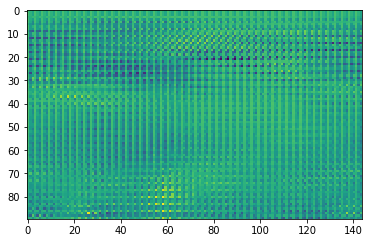

In [15]:
import matplotlib.pyplot as plt
plt.imshow()
plt.show()

In [16]:
ds.pattern1[0]

<xarray.DataArray 'pattern1' (lat1: 90, lon1: 144)>
array([[ 0.010728,  0.008079,  0.005536, ...,  0.010727,  0.008076,  0.005492],
       [ 0.010727,  0.008075,  0.005497, ...,  0.010734,  0.008094,  0.005532],
       [ 0.010733,  0.008093,  0.005496, ...,  0.010727,  0.008076,  0.005531],
       ...,
       [ 0.006073,  0.002173,  0.003286, ...,  0.00364 , -0.002993,  0.009877],
       [ 0.003575, -0.006196,  0.011874, ...,  0.007955,  0.007585, -0.000323],
       [ 0.007891,  0.008155,  0.002545, ...,  0.006078,  0.000775,  0.004442]],
      dtype=float32)
Coordinates:
  * lon1     (lon1) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * lat1     (lat1) float32 -89.494385 -87.97753 ... 87.97753 89.494385
    mode     float32 0.0
Attributes:
    units:      1
    long_name:  Total Cloud Fraction_pattern

http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/static/JointEOF/d41d8cd98f00b204e9800998ecf8427e/jointEOF_gfdl_esm2g_clt_and_gfdl_esm2g_hur.jpeg


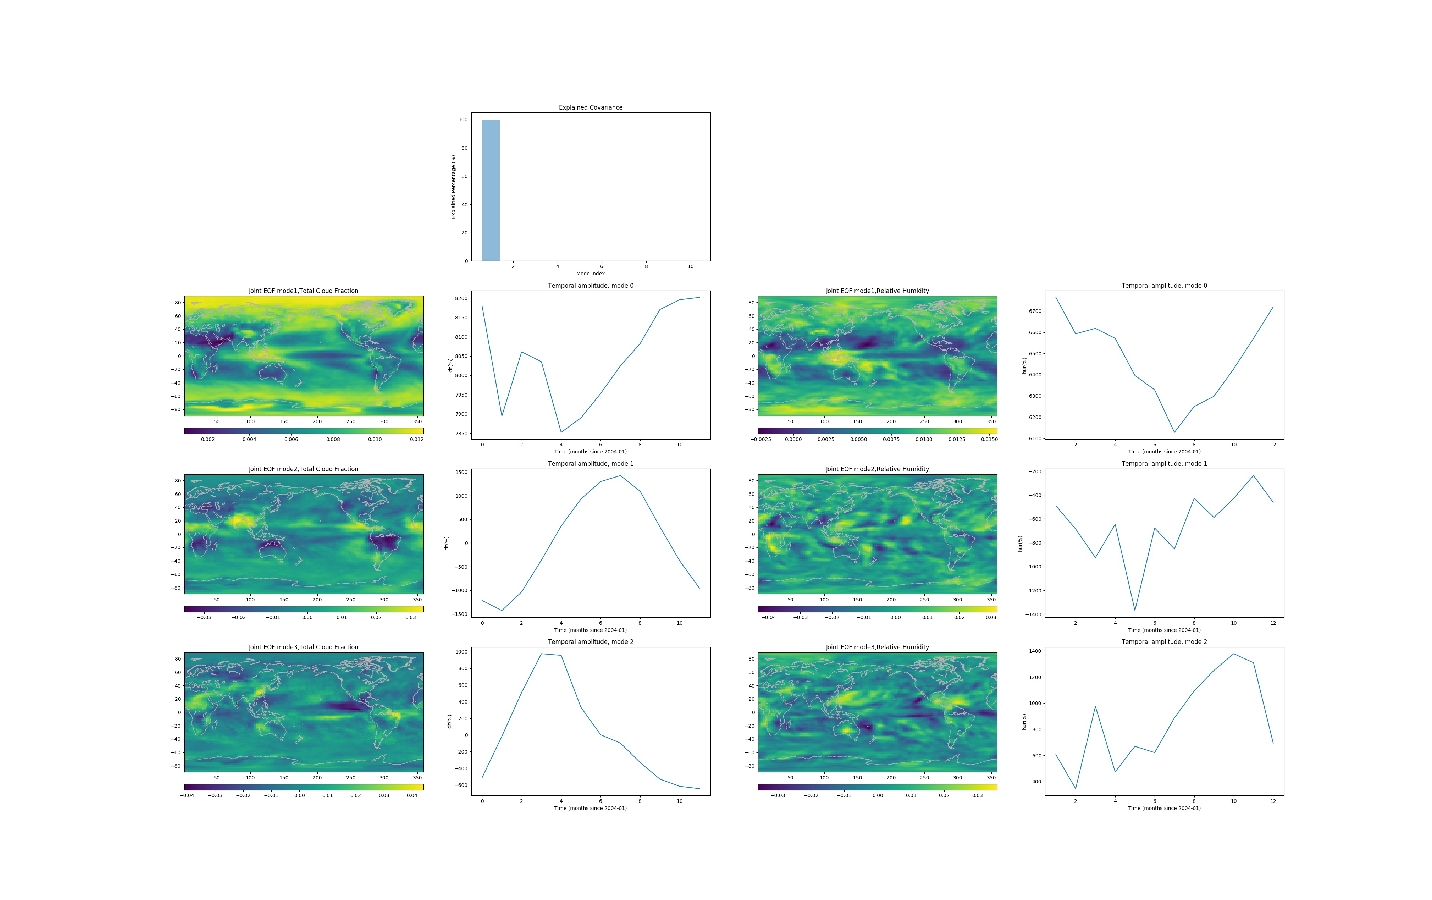

In [10]:
# data from api
print(r.json()['url'])
image = io.imread(r.json()['url'])
f,ax = plt.subplots(1,figsize=(20,16))
ax.imshow(image)
plt.axis('off')
plt.tight_layout()
plt.show()